In [1]:
from pathlib import Path
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Bayesian additive regression trees 

In [2]:
## https://jmloyola.github.io/posts/2019/06/introduction-to-bart
## https://www.pymc.io/projects/bart/en/latest/examples/BART_introduction.html#Partial-dependence-plots

RANDOM_SEED = 5781
np.random.seed(RANDOM_SEED)

In [3]:
bikes = pd.read_csv(pm.get_data("bikes.csv"))
X = bikes[["hour", "temperature", "humidity", "workingday"]]
Y = bikes["count"]

with pm.Model() as model_bikes:
    α = pm.Exponential("α", 1 / 10)
    μ = pmb.BART("μ", X, Y)
    y = pm.NegativeBinomial("y", mu=np.abs(μ), alpha=α, observed=Y)
    idata_bikes = pm.sample(random_seed=RANDOM_SEED)



Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 73 seconds.


/home/ondrej/anaconda3/envs/covid_pyenv/lib/python3.10/site-packages/arviz/plots/hdiplot.py:156: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/home/ondrej/anaconda3/envs/covid_pyenv/lib/python3.10/site-packages/arviz/plots/hdiplot.py:156: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/home/ondrej/anaconda3/envs/covid_pyenv/lib/python3.10/site-packages/pymc_bart/utils.py:266: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = az.hdi(nyi)


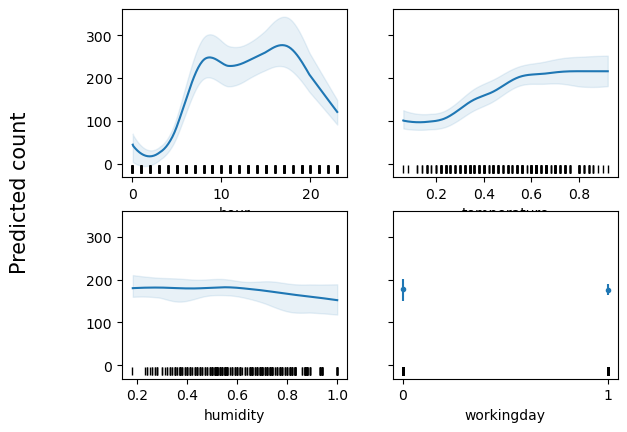

In [4]:
q = pmb.plot_dependence(μ, X=X, Y=Y, grid=(2, 2), var_discrete=[3])

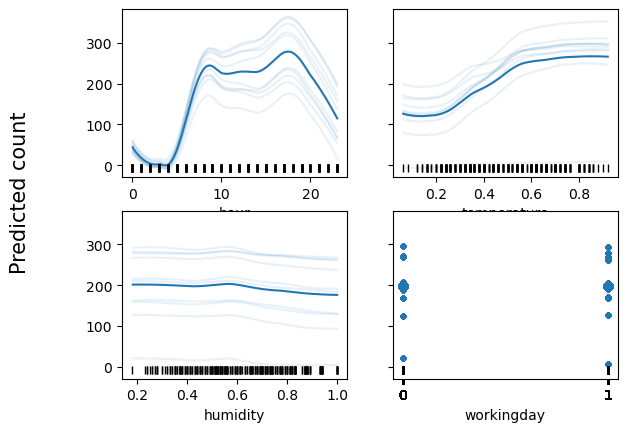

In [5]:
q = pmb.plot_dependence(μ, X=X, Y=Y, grid=(2, 2), var_discrete=[3], kind="ice")

In [6]:
az.plot_posterior(idata_bikes, var_names=["hours"], 
                  coords={"workingday": 0}, kind='hist',
                  credible_interval=0.95,
                  color='blue',
                  ref_val={'hours': 0})

KeyError: 'var names: "[\'hours\'] are not present" in dataset'